<h1 align="center">
<img src="https://drive.google.com/uc?export=view&id=1_ZkE3dnYg9KykzdZE6lIK2s_q_nbiKk_" width="160" height="160">
</h1>
<h5 align="center">Sharif University of Technology<br/>Electrical Engineering Department<br/>Fall 2023</h5>

---

# Machine Learning Autumn 2024
# Computer assignment 03


> **Instructions:**
> * You will be using Python 3.
> * Using for loops is not allowed in this problem set!
> * Please upload your assignment on CW.
> * Your file name should be in format of ***PythonHW#_Name_ID***
> * Do not copy other students’ answers.

In [1]:
### Please Fill the following entries
StudentName = 'Mohammad Hossein Shafieizadegan'
StudentID   = '99104781'

print (f'StudentName:{StudentName} , StudentID:{StudentID}')

StudentName:Mohammad Hossein Shafieizadegan , StudentID:99104781


**introduction**
> By understanding the audio characteristics of the songs a person listens to, we can identify similarities and recommend music accordingly. Your task is to apply the K-means clustering algorithm to group music genres based on their audio features.

**Task One:**
* Load dataset using pandas
* drop column index because it is not needed
* find correlation between features and print it.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

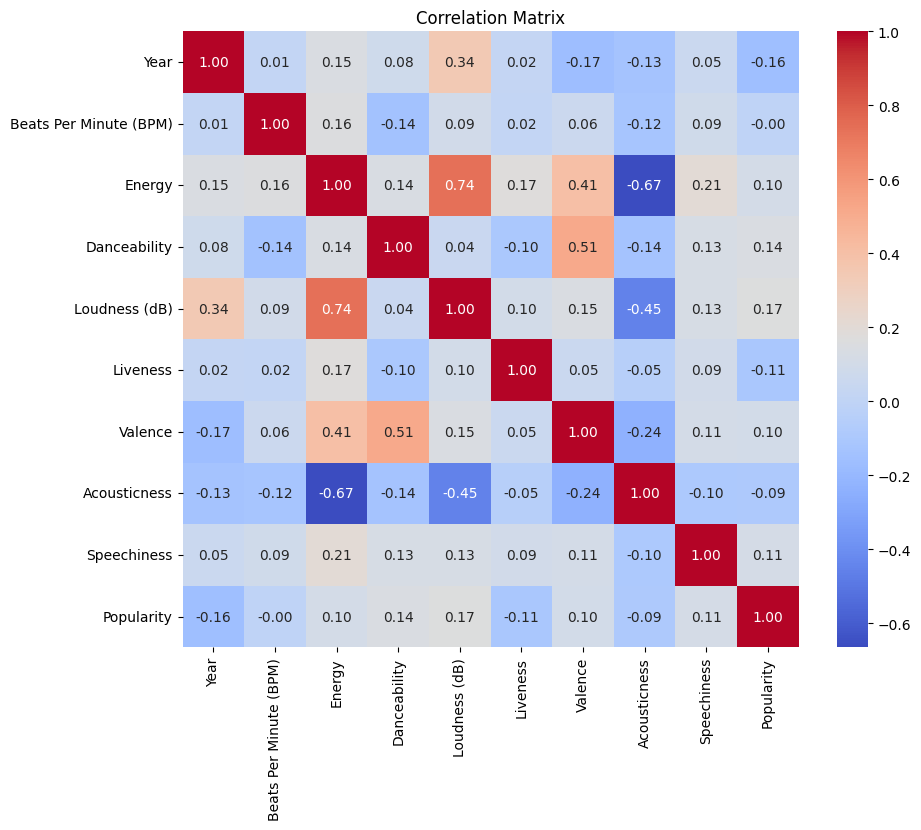

In [3]:
# Task One: Load dataset using pandas
df = pd.read_csv('Spotify-2000.csv')

df = df.drop('Index', axis=1)

# Find correlation between features
correlation = df.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

**K-means Clustering:**
* Select following features : ("Beats Per Minute (BPM)", "Loudness (dB)",
              "Liveness", "Valence", "Acousticness",
              "Speechiness")
* Use min max algorithm to scale all columns
* Apply the K-means clustering algorithm to group songs into 10 clusters by using scikit learn library.(only use selected features)

In [4]:
selected_features = ["Beats Per Minute (BPM)", "Loudness (dB)", "Liveness", "Valence", "Acousticness", "Speechiness"]

# Select the desired columns from the DataFrame
selected_df = df[selected_features]

# Use MinMaxScaler to scale all columns
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(selected_df)

# K-means clustering algorithm
k = 10  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_df)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the selected DataFrame
selected_df['Cluster'] = labels

selected_df.head()

c:\Users\Moh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\Moh\AppData\Local\Temp\ipykernel_4520\331610856.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Cluster'] = labels


,Beats Per Minute (BPM),Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Cluster
0,157,-14,11,68,94,3,9
1,135,-11,17,81,17,7,3
2,168,-9,7,52,2,17,1
3,173,-4,3,37,0,4,1
4,106,-5,10,87,1,3,3


**Visualization:**

* Add the cluster labels to the original dataset.
* Map cluster labels to meaningful names (e.g., "Cluster 1", "Cluster 2").
* Create a 3D scatter plot using Plotly to visualize the clusters based on selected audio features.
* Interpret the visualizations and discuss any patterns or insights.

In [5]:
import plotly.express as px

cluster_names = {
    0: "Cluster 1",
    1: "Cluster 2",
    2: "Cluster 3",
    3: "Cluster 4",
    4: "Cluster 5",
    5: "Cluster 6",
    6: "Cluster 7",
    7: "Cluster 8",
    8: "Cluster 9",
    9: "Cluster 10"
}
selected_df['Cluster'] = selected_df['Cluster'].map(cluster_names)

# Create a 3D scatter plot
fig = px.scatter_3d(selected_df, x='Acousticness', y='Valence', z='Liveness', color='Cluster')

# Customize the plot layout
fig.update_layout(
    scene=dict(
        xaxis_title='Acousticness',
        yaxis_title='Valence',
        zaxis_title='Liveness'
    ),
    title='Cluster Visualization'
)

fig.show()


C:\Users\Moh\AppData\Local\Temp\ipykernel_4520\794753465.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Cluster'] = selected_df['Cluster'].map(cluster_names)


<font color="aqua"> 

<h3> Interpretation </h3>

In the above figure, we have visualized our data after clustering into 10 clusters using `Acousticness`, `Liveness` and `valence` features. In this 3D space of these features, It can be seen that some clusters are quite well sepearated from others and there is an acceptable cross-cluster distance. On the other hand, there are some clusters that are some how mixed in this visualization. Therefore, in order to observe the output of the clustering better, we will visualize our data using all possible combinations of the features in the following. It can be seen that our clustering process has been successfully done.

</font>

In [6]:
import itertools
import plotly.express as px

# Create a list of feature names
feature_names = ["Beats Per Minute (BPM)", "Loudness (dB)", "Liveness", "Valence", "Acousticness", "Speechiness"]

# Generate all combinations of 3 features
feature_combinations = list(itertools.combinations(feature_names, 3))

# Loop through each combination and create a separate 3D scatter plot
for combination in feature_combinations:
    fig = px.scatter_3d(selected_df, x=combination[0], y=combination[1], z=combination[2], color='Cluster')
    fig.update_layout(title=f"3D Scatter Plot: {combination[0]}, {combination[1]}, {combination[2]}")
    fig.show()

# Part 2:

In this part, you will find related features to the popularity of songs using forward selection algorithm.

**Numerize Non-Numeric Features:**

* Identify non-numeric features in the dataset.
* Implement the necessary transformations to numerize these features.

In [7]:
df = pd.read_csv('Spotify-2000.csv')

df = df.drop('Index', axis=1)

df.head()

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [8]:
# Identify non-numeric features
from sklearn.calibration import LabelEncoder


non_numeric_features = df.select_dtypes(exclude=[int, float]).columns.tolist()

# Apply label encoding to non-numeric features
label_encoder = LabelEncoder()
for feature in non_numeric_features:
    df[feature] = label_encoder.fit_transform(df[feature])



In [9]:
df.head()

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1530,443,2,2004,157,30,53,-14,11,68,80,94,3,71
1,193,152,5,2000,135,79,50,-11,17,81,86,17,7,39
2,290,250,8,2001,168,69,66,-9,7,52,218,2,17,69
3,1628,220,9,2007,173,96,43,-4,3,37,148,0,4,76
4,1776,86,61,2002,106,82,58,-5,10,87,135,1,3,59


Split the dataset into training and testing sets.

In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df.drop('Popularity', axis=1) 
y = df['Popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Implement Forward Selection algorithm( you can find the algorithm in class note 8)
* Select 5 most related features and print them

<font color="aqua">
<h3> Explanation </h3>
In the following section, we will attempt to predict the value of popularity using different features. In the code below, in each section, we have used different method for predicting popularity. These methods include `RandomForestClassifier`, `RandomForestRegressor`, `MLPRegressor`and `LinearRegression`.
</font>

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Initialize an empty list to store the selected features
selected_features = []

max_features = 5

while len(selected_features) < max_features:
    best_score = -1  # Initialize the best feature importance score
    best_feature = None  # Initialize the best feature
    
    # Iterate over the remaining features
    for feature in X_train.columns:
        if feature not in selected_features:

            feature_set = X_train[selected_features + [feature]]
            
            # Train a Random Forest classifier
            classifier = RandomForestClassifier()
            classifier.fit(feature_set, y_train)
            
            # Retrieve feature importances
            feature_importances = classifier.feature_importances_
            
            # Compute the average feature importance score
            score = feature_importances.mean()
            
            # Update the best score and feature if necessary
            if score > best_score:
                best_score = score
                best_feature = feature
    
    # Add the best feature to the selected features list
    selected_features.append(best_feature)

print("Selected Features:")
for feature in selected_features:
    print(feature)

Selected Features:
Title
Artist
Top Genre
Year
Loudness (dB)


In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Initialize an empty list to store the selected features
selected_features = []

max_features = 5

while len(selected_features) < max_features:
    best_score = -float('inf')  # Initialize the best feature importance score
    best_feature = None  # Initialize the best feature
    
    # Iterate over the remaining features
    for feature in X_train.columns:
        if feature not in selected_features:

            feature_set = X_train[selected_features + [feature]]
            
            # Train a Random Forest regressor
            regressor = RandomForestRegressor()
            regressor.fit(feature_set, y_train)
            
            # Retrieve feature importances
            feature_importances = regressor.feature_importances_
            
            # Compute the average feature importance score
            score = feature_importances.mean()
            
            # Update the best score and feature if necessary
            if score > best_score:
                best_score = score
                best_feature = feature
    
    selected_features.append(best_feature)

print("Selected Features:")
for feature in selected_features:
    print(feature)

Selected Features:
Title
Artist
Top Genre
Year
Beats Per Minute (BPM)


In [13]:
import pandas as pd
from sklearn.neural_network import MLPRegressor

# Initialize an empty list to store the selected features
selected_features = []

max_features = 5

while len(selected_features) < max_features:
    best_score = -float('inf')  # Initialize the best feature importance score
    best_feature = None  # Initialize the best feature
    
    # Iterate over the remaining features
    for feature in X_train.columns:
        if feature not in selected_features:

            feature_set = X_train[selected_features + [feature]]
            
            # Train an MLP regressor
            regressor = MLPRegressor()
            regressor.fit(feature_set, y_train)
            
            # Retrieve the coefficient of determination (R^2) score
            score = regressor.score(feature_set, y_train)
            
            # Update the best score and feature if necessary
            if score > best_score:
                best_score = score
                best_feature = feature
    
    # Add the best feature to the selected features list
    selected_features.append(best_feature)

print("Selected Features:")
for feature in selected_features:
    print(feature)

c:\Users\Moh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\Moh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\Moh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\Moh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\Moh\AppData

Selected Features:
Valence
Liveness
Year
Top Genre
Length (Duration)


In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Initialize an empty list to store the selected features
selected_features = []

max_features = 5

while len(selected_features) < max_features:
    best_score = -float('inf')  # Initialize the best R^2 score
    best_feature = None  # Initialize the best feature
    
    # Iterate over the remaining features
    for feature in X_train.columns:
        if feature not in selected_features:

            feature_set = X_train[selected_features + [feature]]
            
            # Train a Linear Regression model
            regressor = LinearRegression()
            regressor.fit(feature_set, y_train)
            
            # Evaluate the model using the coefficient of determination (R^2) score
            score = regressor.score(feature_set, y_train)
            
            # Update the best score and feature if necessary
            if score > best_score:
                best_score = score
                best_feature = feature
    
    # Add the best feature to the selected features list
    selected_features.append(best_feature)

print("Selected Features:")
for feature in selected_features:
    print(feature)

Selected Features:
Loudness (dB)
Year
Danceability
Liveness
Speechiness
